In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

cd_df = pd.read_csv(city_data_to_load)
rd_df = pd.read_csv(ride_data_to_load)
rd_df.head()

city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344

In [3]:
cd_df.head()

city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [4]:
print(cd_df.info())
print(rd_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB
None


In [5]:
cd_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
print(f'Urban = {sum(cd_df.type=="Urban")}')
print(f'Suburban = {sum(cd_df.type=="Suburban")}')
print(f'Rural = {sum(cd_df.type=="Rural")}')

Urban = 66
Suburban = 36
Rural = 18


In [7]:
pyber_data_df = pd.merge(rd_df, cd_df, how="left", on=["city", "city"])
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [8]:
pyber_data_df.describe()

fare       ride_id  driver_count
count  2375.000000  2.375000e+03   2375.000000
mean     26.753112  4.887270e+12     28.930105
std      12.109465  2.907361e+12     20.666306
min       4.050000  3.218337e+08      1.000000
25%      17.190000  2.381175e+12     11.000000
50%      26.600000  4.748541e+12     23.000000
75%      36.645000  7.461936e+12     45.000000
max      58.550000  9.991538e+12     73.000000

In [9]:
# Create the unique city DataFrames.
urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"].reset_index(drop=True)
suburb_df = pyber_data_df[pyber_data_df["type"] == "Suburban"].reset_index(drop=True)
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"].reset_index(drop=True)
rural_df.head()

city                 date   fare        ride_id  driver_count  \
0   Randallchester  2019-04-13 11:13:31  43.22  1076079536213             9   
1      North Holly  2019-02-02 14:54:00  12.42  1985256326182             8   
2      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718             6   
3  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887             2   
4  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936             2   

    type  
0  Rural  
1  Rural  
2  Rural  
3  Rural  
4  Rural

In [10]:
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburb_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [11]:
urban_fare = urban_df.groupby(['city']).mean()['fare']
suburb_fare = suburb_df.groupby(['city']).mean()['fare']
rural_fare = rural_df.groupby(['city']).mean()['fare']
print(urban_fare.head())
print(suburb_fare.head())
print(rural_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [12]:
urban_driver= urban_df.groupby(['city']).mean()['driver_count']
suburb_driver = suburb_df.groupby(['city']).mean()['driver_count']
rural_driver = rural_df.groupby(['city']).mean()['driver_count']
print(f'Average Urban Driver: \n{suburb_driver.head()}')
print(suburb_driver.head())
print(rural_driver.head())

Average Urban Driver: 
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64
city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


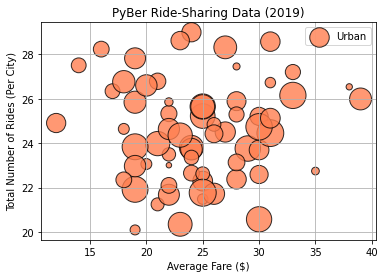

In [13]:
plt.scatter(urban_ride_count, 
    urban_fare, 
    s=urban_driver*10,
    edgecolors='black', linewidths=1,
    c="coral",
    alpha=.8,
    label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

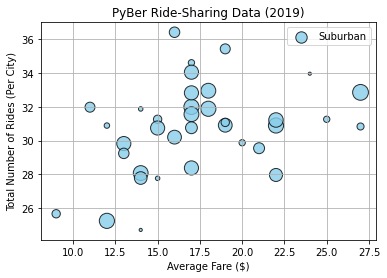

In [14]:
plt.scatter(suburban_ride_count, 
    suburb_fare, 
    s=suburb_driver*10,
    edgecolors='black', linewidths=1,
    c="skyblue",
    alpha=.8,
    label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

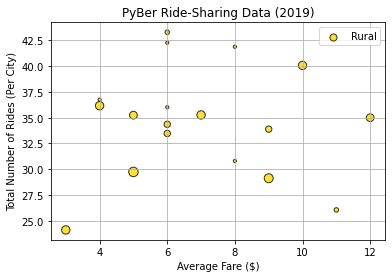

In [15]:
plt.scatter(rural_ride_count, 
    rural_fare, 
    s=rural_driver*10,
    edgecolors='black', linewidths=1,
    c="gold",
    alpha=.8,
    label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

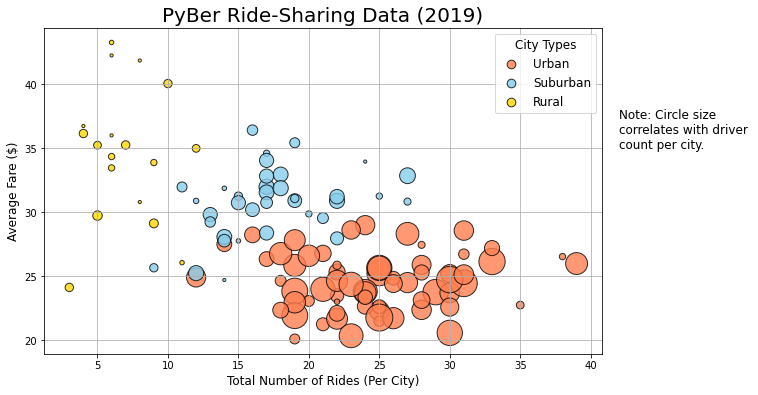

<Figure size 432x288 with 0 Axes>

In [16]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
    urban_fare, 
    s=urban_driver*10,
    edgecolors='black', linewidths=1,
    c="coral",
    alpha=.8,
    label="Urban")

plt.scatter(suburban_ride_count, 
    suburb_fare, 
    s=suburb_driver*10,
    edgecolors='black', linewidths=1,
    c="skyblue",
    alpha=.8,
    label="Suburban")

plt.scatter(rural_ride_count, 
    rural_fare, 
    s=rural_driver*10,
    edgecolors='black', linewidths=1,
    c="gold",
    alpha=.8,
    label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size \ncorrelates with driver \ncount per city.", fontsize="12")
# Show the plot
plt.show()
# Save the figure.
plt.savefig("analysis/Fig1.png")

In [17]:
#print(f'Urban mean fare = {pyber_data_df.groupby(['type']).mean()['fare']}')
#print(f'Suburban mean fare= {sum(cd_df.type=="Suburban")}')
#print(f'Rural mean fare = {sum(cd_df.type=="Rural")}')


In [21]:
#describe the sity type datasets
print(urban_df.describe())
print(suburb_df.describe())
print(rural_df.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.8878

In [23]:
#describe the ride count data sets
print(urban_ride_count.describe())
print(suburban_ride_count.describe())
print(rural_ride_count.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [26]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [27]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [28]:
suburban_ride_count.mode()

0    17
dtype: int64

In [34]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [35]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [37]:
urban_fare_list = urban_df['fare']
suburb_fare_list = suburb_df['fare']
rural_fare_list = rural_df['fare']
urban_fare_list.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [38]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fare_list)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fare_list)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fare_list)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [39]:
# Calculate the measures of central tendency for the average fare for the suburb cities.
mean_suburb_fares = np.mean(suburb_fare_list)
print(f"The mean fare price for suburb trips is ${mean_suburb_fares:.2f}.")

median_suburb_fares = np.median(suburb_fare_list)
print(f"The median fare price for suburb trips is ${median_suburb_fares:.2f}.")

mode_suburb_fares = sts.mode(suburb_fare_list)
print(f"The mode fare price for suburb trips is {mode_suburb_fares}.")

The mean fare price for suburb trips is $30.97.
The median fare price for suburb trips is $30.75.
The mode fare price for suburb trips is ModeResult(mode=array([17.99]), count=array([3])).


In [40]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fare_list)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fare_list)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fare_list)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [41]:
urban_driver_list = urban_df['driver_count']
suburb_driver_list = suburb_df['driver_count']
rural_driver_list = rural_df['driver_count']
urban_driver_list.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [45]:
# Calculate the measures of central tendency for the average driver for the urban cities.
mean_urban_drivers = np.mean(urban_driver_list)
print(f"The mean drivers for urban cities is {mean_urban_drivers}.")

median_urban_drivers = np.median(urban_driver_list)
print(f"The median drivers for urban cities is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_driver_list)
print(f"The mode drivers for urban cities is {mode_urban_drivers}.")

The mean drivers for urban cities is 36.67815384615385.
The median drivers for urban cities is 37.0.
The mode drivers for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [46]:
# Calculate the measures of central tendency for the average driver for the suburb cities.
mean_suburb_drivers = np.mean(suburb_driver_list)
print(f"The mean drivers for suburb cities is {mean_suburb_drivers}.")

median_suburb_drivers = np.median(suburb_driver_list)
print(f"The median drivers for suburb cities is {median_suburb_drivers}.")

mode_suburb_drivers = sts.mode(suburb_driver_list)
print(f"The mode drivers for suburb cities is {mode_suburb_drivers}.")

The mean drivers for suburb cities is 13.712.
The median drivers for suburb cities is 16.0.
The mode drivers for suburb cities is ModeResult(mode=array([20]), count=array([79])).


In [48]:
# Calculate the measures of central tendency for the average driver for the rural cities.
mean_rural_drivers = np.mean(rural_driver_list)
print(f"The mean drivers for rural cities is {mean_rural_drivers}.")

median_rural_drivers = np.median(rural_driver_list)
print(f"The median drivers for rural cities is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_driver_list)
print(f"The mode drivers for rural cities is {mode_rural_drivers}.")

The mean drivers for rural cities is 4.296.
The median drivers for rural cities is 4.0.
The mode drivers for rural cities is ModeResult(mode=array([1]), count=array([32])).


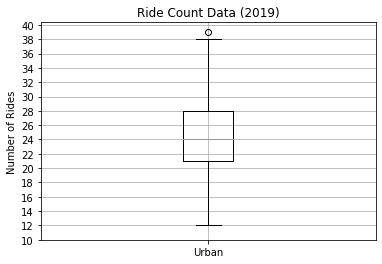

In [49]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

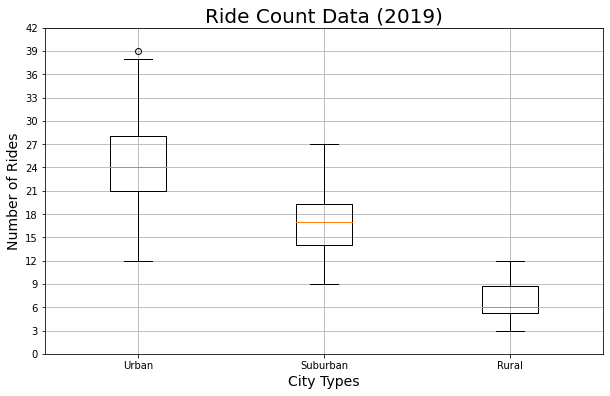

In [50]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [51]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


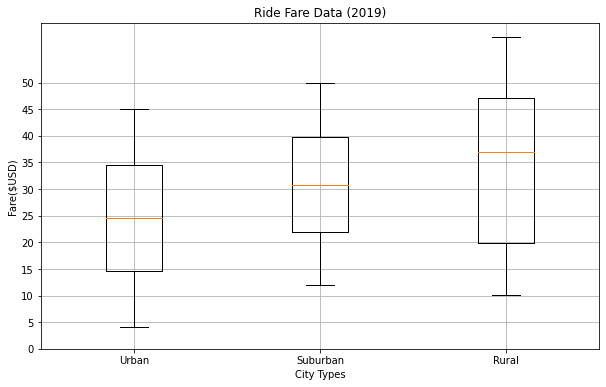

In [61]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
fare_count_data = [urban_fare_list, suburb_fare_list, rural_fare_list]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()
#print("Summary Statistics")
#urban_fare_list.describe()


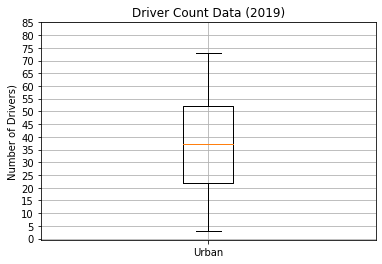

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [64]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_list,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_driver_list.describe()

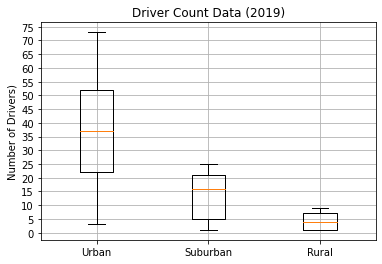

Summary Statistics


In [68]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
driver_count_data = [urban_driver_list, suburb_driver_list, rural_driver_list]
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()
print("Summary Statistics")
#urban_driver_list.describe()

In [69]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [71]:
total_fares = pyber_data_df.fare.sum()
total_fares

63538.64

In [72]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

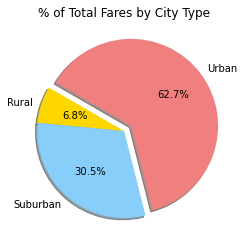

In [76]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()